<a href="https://colab.research.google.com/github/FadlilaAfida/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: Fadlila Afida
# Absen: 09
# NIM: 2141720130
# Kelas: 3B-D4 TI

## Import Folder yang ada di Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Library

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV) dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan diatas.

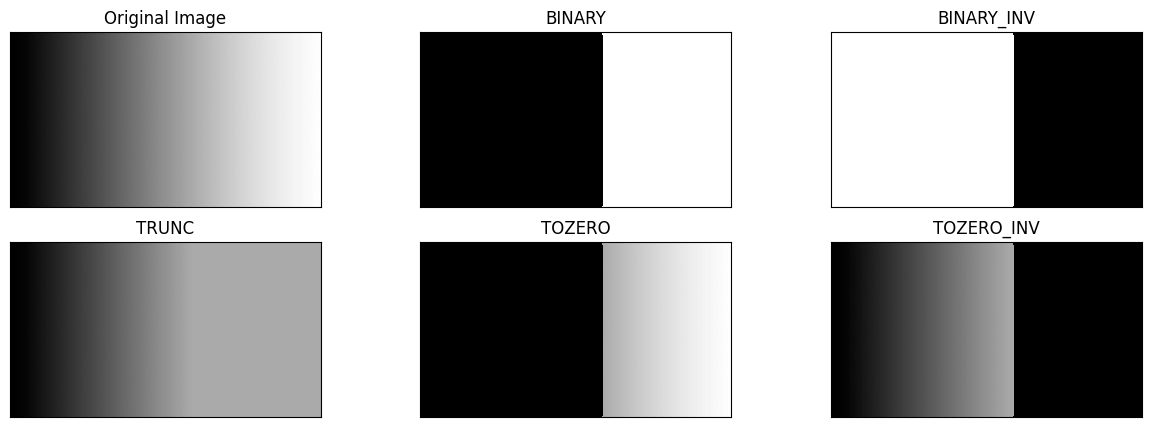

In [19]:
dir = '/content/drive/MyDrive/PCVK_Gambar/gradient.jpg'
img = cv2.imread(dir)
thresholdBinary = cv2.imread(dir)
thresholdTrunc = cv2.imread(dir)
thresholdTozero = cv2.imread(dir)

threshold = 170

# Threshold Binary
thresholdBinary[img>threshold] = 255
thresholdBinary[img<=threshold] = 0

# Threshold Truncate
thresholdTrunc[img>threshold] = threshold

# Threshold Tozero
thresholdTozero[img<=threshold] = 0

# Threshold Binary Inverted
_, thresholdBinaryInv = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY_INV)

# Threshold Tozero Inverted
_, thresholdTozeroInv = cv2.threshold(img, threshold, 255, cv2.THRESH_TOZERO_INV)

names = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresholdBinary,thresholdBinaryInv, thresholdTrunc, thresholdTozero, thresholdTozeroInv]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(names[i])
    plt.xticks([]), plt.yticks([])

plt.show()


### Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

<ipython-input-23-b356653488d9>:20: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb


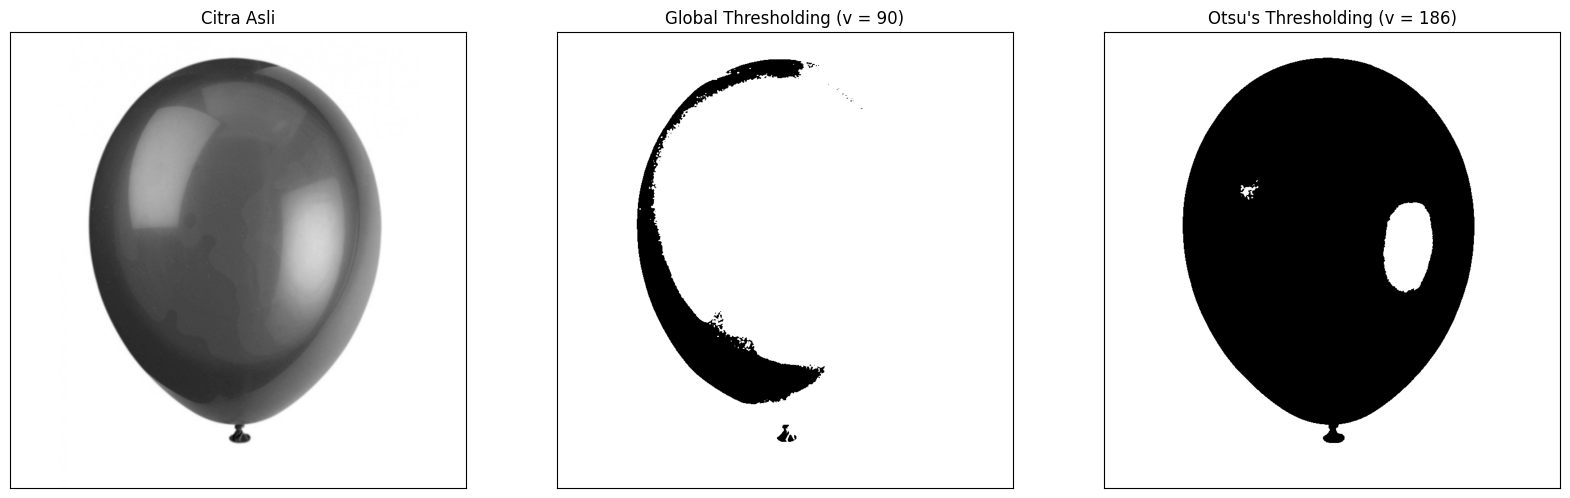

In [23]:
dir = ('/content/drive/MyDrive/PCVK_Gambar/balloon.jpg')

img = cv2.imread(dir,0)
blur = cv2. GaussianBlur (img, (5,5),0)

histogram = cv2.calcHist([blur],[0],None,[256], [0,256])
histogram_norm = histogram.ravel()/histogram.max()
Q = histogram_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
threshold = -1

for i in range(0,187):
  wb += histogram[i]
  wf = (img.shape[0]*img.shape[1]) - wb
  sumb += (i*histogram[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)
  if (betweenvar>varmax):
    varmax = betweenvar
    threshold = i

x = ("Otsu's Thresholding (v = ")+str(threshold)+")"
ret, thresholdGlobal = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)
ret, thresholdOtsu = cv2.threshold(blur, threshold, 255, cv2. THRESH_BINARY)

names = ['Citra Asli', 'Global Thresholding (v = 90)', x]
images = [blur, thresholdGlobal, thresholdOtsu]

plt. figure(figsize = (20,15))
for i in range(len(names)):
    plt.subplot(1,3,i+1),plt.imshow(images[i], 'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images Petunjuk:


*   anda dapat gunakan cv.calcHist untuk menampilkan histogram.

*   Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
*Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).
  

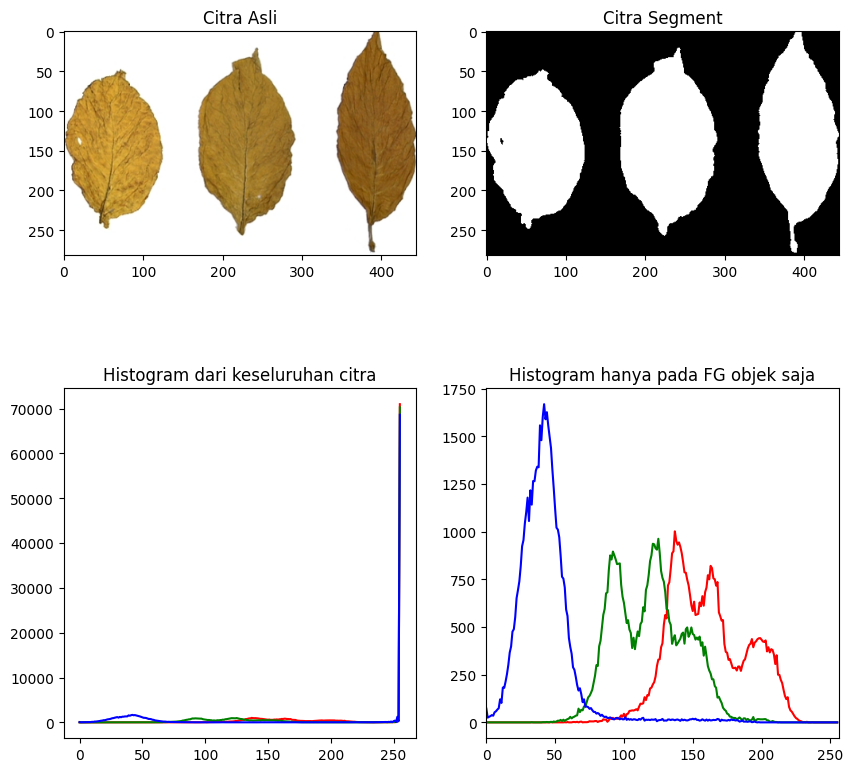

In [24]:
dir = ('/content/drive/MyDrive/PCVK_Gambar/tobacco.jpg')

img = cv2.imread(dir)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
    histogramSeluruhCitra = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(histogramSeluruhCitra,color = col)
    plt.title('Histogram dari keseluruhan citra')
    histogramForeground = cv2.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(histogramForeground,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])
plt.show()

### Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x79e18cf048b0>)

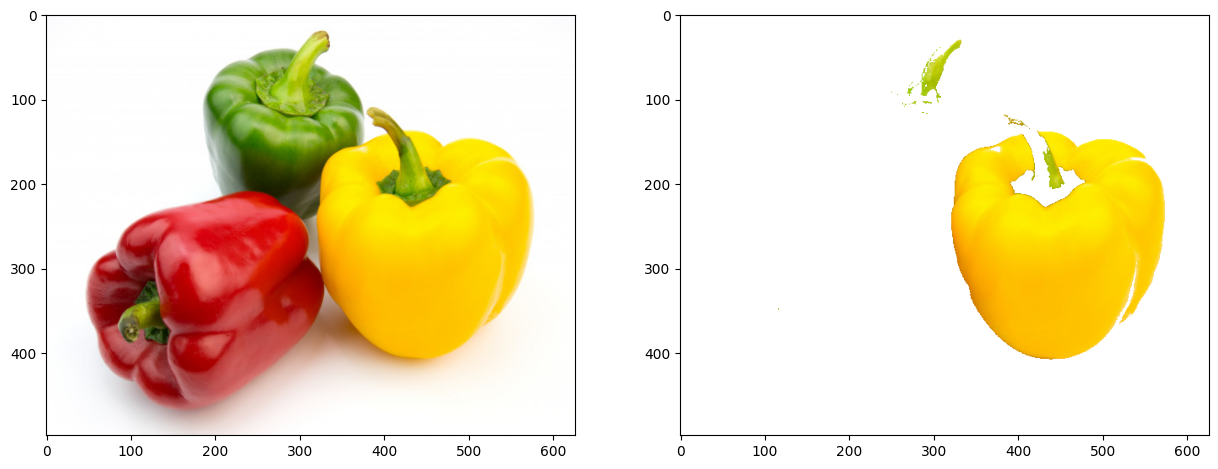

In [25]:
dir = ('/content/drive/MyDrive/PCVK_Gambar/peppers.jpg')
img = cv2.imread(dir)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

segmented_image = np.copy(img)
segmented_image0= segmented_image.reshape((-1, 3))
segmented_image0[labels != 1] = [255, 255, 255]
segmented_image0 = segmented_image0.reshape(img.shape)

plt.figure(figsize = (15,12))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image0)

### Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul ini.

(<Axes: >, <matplotlib.image.AxesImage at 0x79e18c5d18a0>)

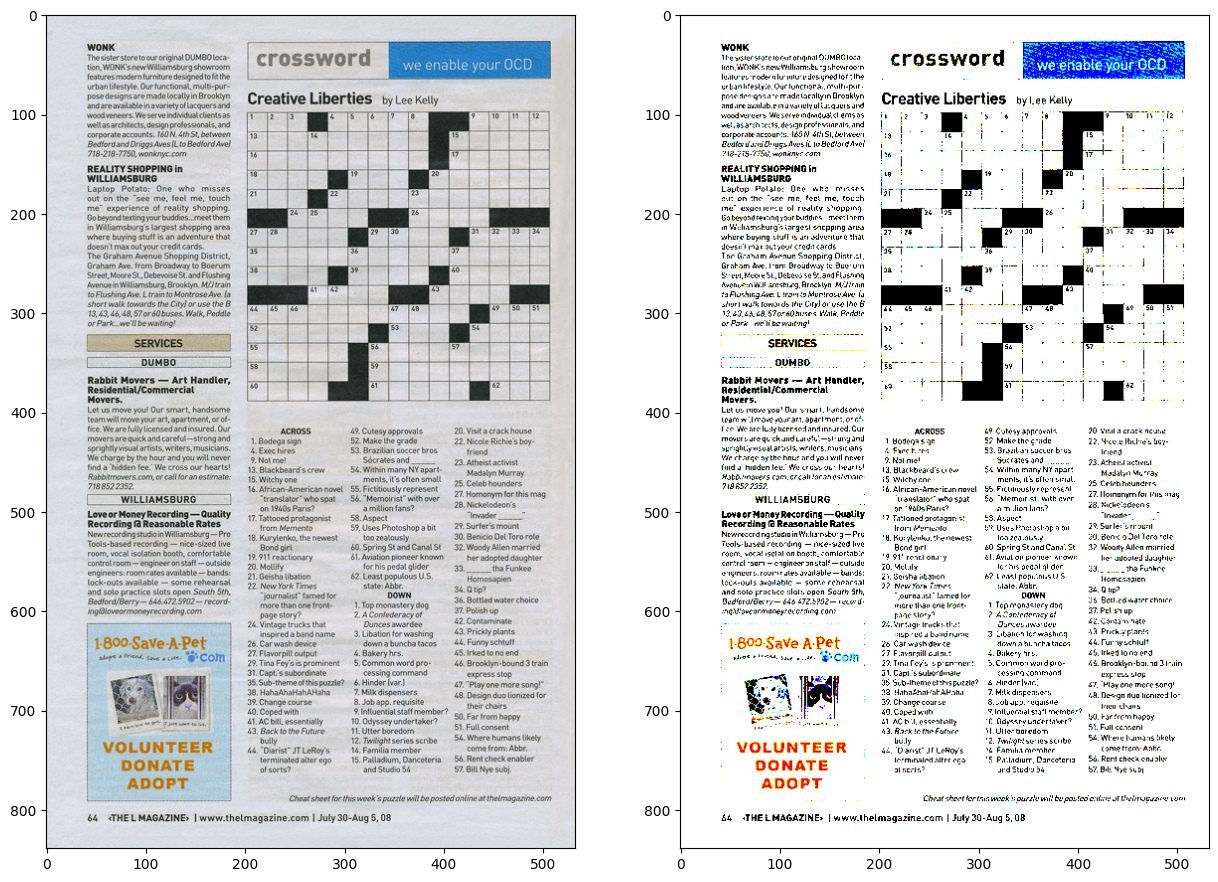

In [44]:
dir = ('/content/drive/MyDrive/PCVK_Gambar/crossword.jpg')
img = cv2.imread(dir)
thresholdBinary = cv2.imread(dir)

threshold = 130

#Threshold Binary
thresholdBinary[img>threshold] = 255
thresholdBinary[img<=threshold] = 0

names = ['Original Image','BINARY']
images = [img, thresholdBinary]


plt.figure(figsize = (15,12))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(thresholdBinary)